<a href="https://colab.research.google.com/github/Shena2/project/blob/main/section1/sprint%20challenge/ai04-sc13x-hena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC13x Linear Algebra

## 1. $\vec{c} \cdot \vec{d}$ 를 구해보세요. 이 두 개의 vector는 orthogonal 관계 (직교)에 있나요? 왜 그런가요? 왜 아닌가요?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [1]:
import numpy as np

c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

# dot을 이용하여 내적 구하기 가능
print('Dot Product between vector c and d :', c.dot(d))

# 벡터의 내적이 0이라면 orthogonal (수직)
# 그러나 0이 아니기 때문에 수직이 아님

Dot Product between vector c and d : 42


## 2. $E^{-1}$ 와 $E^{T}$ 를 구하세요.

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [2]:
e = np.array([
              [7, 4, 2],
              [1, 3, -1],
              [2, 6, -4]
])

# E^{-1} = 역행렬
print(np.linalg.inv(e))

# E.T = 전치행렬
print(e.T)

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


## 3. $|F|$ 를 구하세요. 이 데이터는 어떤 의미가 있나요?

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [7]:
# numpy의 메소드로 Determinant 계산
f = np.array([[2,-2,5],
              [4,1,10],
              [12,6,30]])

In [9]:
np.linalg.matrix_rank(f)

2

## 4. 다음 데이터의 covariance, correlation을 구하세요.

- x = [820, 760, 1250, 990, 1080, 1450, 1600]

- y = [0, 1, 7, 1, 0, 6, 4]

In [10]:
x = [820, 760, 1250, 990, 1080, 1450, 1600]
y = [0, 1, 7, 1, 0, 6, 4]

# Covariance (공분산)
print('Covariance :', np.cov(x, y)[0, 1])

# Correlation (상관계수)
print('Correlation :', np.corrcoef(x, y)[0, 1])

Covariance : 670.2380952380952
Correlation : 0.7284634644730714


## 5. 다음 데이터를 정규화 하세요.

아래 링크를 참조하세요.

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [11]:
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer  

scaled_cols = df.columns.drop('Country')

ct = ColumnTransformer([("transformer", StandardScaler(), scaled_cols)], 
                       remainder='passthrough')

df[scaled_cols] = ct.fit_transform(df[scaled_cols])
df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,Wales,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,Scotland,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,North Ireland,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


## 6. 위 데이터에 PCA 를 적용 후 scatterplot을 그리세요.

In [13]:
from sklearn.decomposition import PCA

# PCA
pc = PCA(2)
Z = pc.fit_transform(df[scaled_cols])
pca_df = pd.DataFrame(Z,columns=["PC1","PC2"])
pca_df

,PC1,PC2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


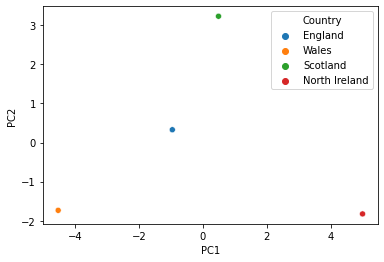

In [14]:
import seaborn as sns

sns.scatterplot(x = 'PC1', y = 'PC2', data = pca_df, hue=df['Country'])

## 7. 아래 데이터에 대해 k-means clustering을 적용 후, 결과를 그래프로 그리세요.



In [15]:
points = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc13x/data.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [16]:
points.shape

(200, 2)

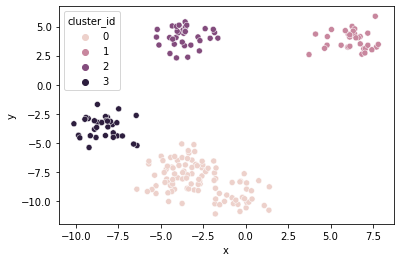

In [18]:
from sklearn.cluster import KMeans

km = KMeans(4)

kmeans = km.fit(points[['x','y']])
points['cluster_id'] = kmeans.labels_

sns.scatterplot(x = 'x', y = 'y', data = points, hue='cluster_id')

# SC 3점 요구사항:
위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들 중 하나를 만족하는 경우 3점을 얻을 수 있습니다.

아래 요구사항들은 모두 optional 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

- 6번의 PCA 결과에 대해서 Scree plot을 추가하세요.

- 7번에서 k값을 선택하는 과정을 논리적으로 설명하세요.
